### Data Collection


In [46]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('BajajFinance.csv')


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,348.394989,352.000000,346.500000,349.970001,323.132202,75660
1,2015-01-02,349.000000,352.000000,341.619995,344.375000,317.966248,140430
2,2015-01-05,346.500000,352.000000,341.100006,343.475006,317.135284,144620
3,2015-01-06,345.000000,348.500000,339.220001,342.584991,316.313538,137810
4,2015-01-07,340.375000,351.795013,340.375000,349.559998,322.753632,109470


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1394,2020-09-01,3517.000000,3674.000000,3500.199951,3643.850098,3643.850098,6065182
1395,2020-09-02,3642.699951,3680.000000,3573.449951,3668.649902,3668.649902,4281011
1396,2020-09-03,3668.000000,3676.750000,3605.000000,3619.699951,3619.699951,3221366
1397,2020-09-04,3541.500000,3649.800049,3520.750000,3596.800049,3596.800049,4914649
1398,2020-09-07,3607.000000,3629.000000,3477.600098,3505.149902,3505.149902,4665168


In [5]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,348.394989,352.000000,346.500000,349.970001,323.132202,75660
1,2015-01-02,349.000000,352.000000,341.619995,344.375000,317.966248,140430
2,2015-01-05,346.500000,352.000000,341.100006,343.475006,317.135284,144620
3,2015-01-06,345.000000,348.500000,339.220001,342.584991,316.313538,137810
4,2015-01-07,340.375000,351.795013,340.375000,349.559998,322.753632,109470
...,...,...,...,...,...,...,...
1394,2020-09-01,3517.000000,3674.000000,3500.199951,3643.850098,3643.850098,6065182
1395,2020-09-02,3642.699951,3680.000000,3573.449951,3668.649902,3668.649902,4281011
1396,2020-09-03,3668.000000,3676.750000,3605.000000,3619.699951,3619.699951,3221366
1397,2020-09-04,3541.500000,3649.800049,3520.750000,3596.800049,3596.800049,4914649


In [6]:
df1=df.reset_index()['Close']


In [7]:
df1

0        349.970001
1        344.375000
2        343.475006
3        342.584991
4        349.559998
           ...     
1394    3643.850098
1395    3668.649902
1396    3619.699951
1397    3596.800049
1398    3505.149902
Name: Close, Length: 1399, dtype: float64

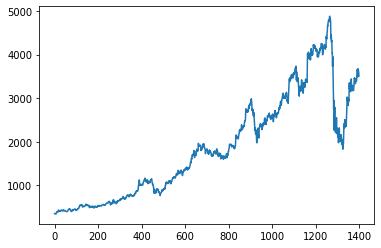

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler


In [9]:
import numpy as np


In [10]:
df1

0        349.970001
1        344.375000
2        343.475006
3        342.584991
4        349.559998
           ...     
1394    3643.850098
1395    3668.649902
1396    3619.699951
1397    3596.800049
1398    3505.149902
Name: Close, Length: 1399, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)


[[1.62741943e-03]
 [3.94460593e-04]
 [1.96130771e-04]
 ...
 [7.22171068e-01]
 [7.17124664e-01]
 [6.96927910e-01]]


In [13]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size


(979, 420)

In [15]:
train_data


array([[1.62741943e-03],
       [3.94460593e-04],
       [1.96130771e-04],
       [0.00000000e+00],
       [1.53706791e-03],
       [1.40594855e-03],
       [5.33293496e-04],
       [2.72157930e-04],
       [1.25940211e-03],
       [7.67100750e-03],
       [9.57168097e-03],
       [1.12817384e-02],
       [1.04873095e-02],
       [1.05534239e-02],
       [8.62850641e-03],
       [9.14086451e-03],
       [9.79095279e-03],
       [1.63887627e-02],
       [1.97614991e-02],
       [1.54819506e-02],
       [1.37663856e-02],
       [1.61805201e-02],
       [1.64493692e-02],
       [1.50147717e-02],
       [1.55282261e-02],
       [1.35889909e-02],
       [1.28066874e-02],
       [1.27361681e-02],
       [1.51282577e-02],
       [1.54345724e-02],
       [1.67160124e-02],
       [1.94011953e-02],
       [1.96821631e-02],
       [1.94717146e-02],
       [1.68658611e-02],
       [1.62345091e-02],
       [1.53045562e-02],
       [1.44484245e-02],
       [1.47866902e-02],
       [1.50125658e-02],


In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)


(828, 150)
(828,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)


(269, 150)
(269,)


(None, None)

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
X_train[:100]


array([[[0.00162742],
        [0.00039446],
        [0.00019613],
        ...,
        [0.047075  ],
        [0.04483606],
        [0.04532528]],

       [[0.00039446],
        [0.00019613],
        [0.        ],
        ...,
        [0.04483606],
        [0.04532528],
        [0.04435676]],

       [[0.00019613],
        [0.        ],
        [0.00153707],
        ...,
        [0.04532528],
        [0.04435676],
        [0.04465646]],

       ...,

       [[0.02172277],
        [0.02200044],
        [0.01742449],
        ...,
        [0.05615746],
        [0.05694528],
        [0.05883825]],

       [[0.02200044],
        [0.01742449],
        [0.0210242 ],
        ...,
        [0.05694528],
        [0.05883825],
        [0.05788184]],

       [[0.01742449],
        [0.0210242 ],
        [0.0189263 ],
        ...,
        [0.05883825],
        [0.05788184],
        [0.05667863]]])

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
13/13 [==============================] - 4s 330ms/step - loss: 0.0241 - val_loss: 0.0825
Epoch 2/100
13/13 [==============================] - 3s 244ms/step - loss: 0.0055 - val_loss: 0.0108
Epoch 3/100
13/13 [==============================] - 3s 246ms/step - loss: 0.0016 - val_loss: 0.0098
Epoch 4/100
13/13 [==============================] - 3s 243ms/step - loss: 8.5881e-04 - val_loss: 0.0099
Epoch 5/100
13/13 [==============================] - 3s 237ms/step - loss: 5.4846e-04 - val_loss: 0.0097
Epoch 6/100
13/13 [==============================] - 3s 239ms/step - loss: 5.1681e-04 - val_loss: 0.0089
Epoch 7/100
13/13 [==============================] - 3s 239ms/step - loss: 5.0478e-04 - val_loss: 0.0090
Epoch 8/100
13/13 [==============================] - 3s 236ms/step - loss: 4.9187e-04 - val_loss: 0.0089
Epoch 9/100
13/13 [==============================] - 3s 236ms/step - loss: 4.8906e-04 - val_loss: 0.0091
Epoch 10/100
13/13 [==============================] - 3s 238ms/step

In [27]:
import tensorflow as tf


In [28]:
tf.__version__


'2.3.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1496.8595006987346

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


3137.767295012019

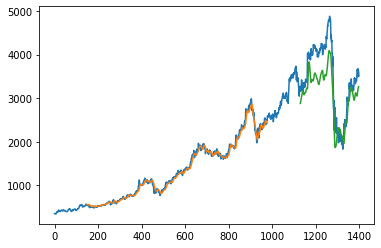

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [34]:
len(test_data)


420

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 79)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input


[0.3575172216596321,
 0.37467288726454634,
 0.3630815121056645,
 0.34216861634217893,
 0.3275582112244689,
 0.3512367354136154,
 0.35371587472125354,
 0.35502708004193057,
 0.4006873331973921,
 0.44153249819625967,
 0.4560106609548377,
 0.43422732263247715,
 0.45126177507321114,
 0.47702276548274475,
 0.462996367796032,
 0.461244399493185,
 0.4399238014474966,
 0.4644397346008076,
 0.4426784006782057,
 0.44567542623727513,
 0.45250683232943373,
 0.48114363513385655,
 0.5191901921024976,
 0.550416318183787,
 0.5912284495879441,
 0.57116393799343,
 0.586788057224099,
 0.5643435610962233,
 0.5543057907014903,
 0.5483668855581105,
 0.5754500835983845,
 0.5777309133574695,
 0.5705138633730117,
 0.6095851096594186,
 0.6631675522991141,
 0.6314566275512488,
 0.6583304868480178,
 0.6548376334274207,
 0.6373074071153039,
 0.6276883142075808,
 0.6184989819719642,
 0.6307404317512645,
 0.6520059378123387,
 0.682901511985943,
 0.6500556599609387,
 0.6413621555868497,
 0.6512346500277402,
 0.641108

In [38]:
from numpy import array

lst_output=[]
n_steps=79
i=0
while(i<30):
    
    if(len(temp_input)>79):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.6368325]
80
1 day input [0.37467289 0.36308151 0.34216862 0.32755821 0.35123674 0.35371587
 0.35502708 0.40068733 0.4415325  0.45601066 0.43422732 0.45126178
 0.47702277 0.46299637 0.4612444  0.4399238  0.46443973 0.4426784
 0.44567543 0.45250683 0.48114364 0.51919019 0.55041632 0.59122845
 0.57116394 0.58678806 0.56434356 0.55430579 0.54836689 0.57545008
 0.57773091 0.57051386 0.60958511 0.66316755 0.63145663 0.65833049
 0.65483763 0.63730741 0.62768831 0.61849898 0.63074043 0.65200594
 0.68290151 0.65005566 0.64136216 0.65123465 0.64110875 0.62332502
 0.63840925 0.64824865 0.6337154  0.64098754 0.62406327 0.63752778
 0.6433785  0.66168007 0.68792591 0.68322103 0.68640534 0.67777796
 0.67808645 0.65857291 0.67040666 0.67814154 0.67594889 0.67238997
 0.67139832 0.69404112 0.72728359 0.7278676  0.72499179 0.73343189
 0.69310456 0.72749299 0.73295807 0.72217107 0.71712466 0.69692791
 0.63683248]
1 day output [[0.62326443]]
2 day input [0.36308151 0.34216862 0.32755821 0.35123674 0.353

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt


In [41]:
len(df1)


1399

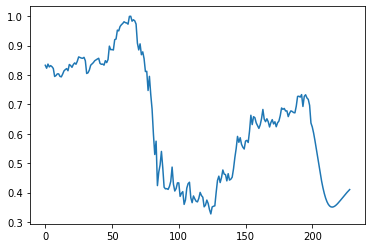

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()


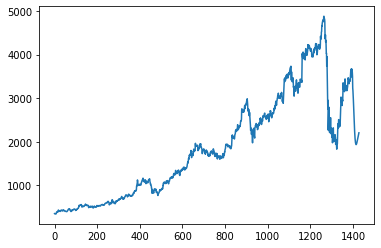

In [45]:
plt.plot(df3)
